# Problem statement

Dream housing finance company deals in all income loans. They have presence across all urban, semi urban & rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are gender, Marital status, Education, Number of dependents, Income, Loan amount, Credit history & others.
To automate this process, they have given problem to identify customers segments, those are eligible for loan amount so that they can specifically target these customers. 




### Objective of solving this problem.
#####  As interest rates for home loans are decreasing over time, the number of applicants are also obviously increasing. Since it is proven from experience that taking decision with substantiation of data is more accurate & reliable than taking decision based on assumptions or experience. Hence building machine learning model to decide whether to approve loan or not, will definitely reduce lot of human efforts, and increase productivity of insurance company. 



## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings                        # To ignore warnings
warnings.filterwarnings("ignore")
import os



C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#pip install pandas-visual-analysis

In [3]:
from pandas_visual_analysis import VisualAnalysis

In [4]:
# Change the working directory

os.chdir("C:\\Users\\Asus\\Desktop\\Python\\Gourabh Python\\Datasets\\Loan prediction Problem_AV")

## Loading the data

In [5]:
train= pd.read_csv("train.csv")
test= pd.read_csv("test.csv")
samp_s= pd.read_csv("sample_submission.csv")

#### Having look at the all the files

In [6]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


#### Shape of the dataset

In [7]:
print(f'Train data contains {train.shape[0]} rows & {train.shape[1]} columns')
print(f'Test data contains {test.shape[0]} rows & {test.shape[1]} columns')


Train data contains 614 rows & 13 columns
Test data contains 367 rows & 12 columns


We see that test data has one less variables. That is absence of target variable.

### Let us keep the original train & test datasets preserved.

We will be making some changes in dataset like tranformation etc. Keeping orignal copy as it is always good practice.

In [8]:
train_original=  train.copy()
test_original= test.copy()

In [9]:
#Checking code above
#train_original
#test_original

## First let us look at the features of training dataset.

In [10]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

The variable "Loan_Status" is our target variable. Rest all are explanatory/ independent variables.


## Test dataset features

In [11]:
print(test.columns)
print(len(test.columns))

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')
12


We see that total 12 variables present in the test data. "Loan_Status" variable is not present in test data, which has to be predicted.

## Let us see the description for each variable.

Understanding the variables used in the model is utmost important.

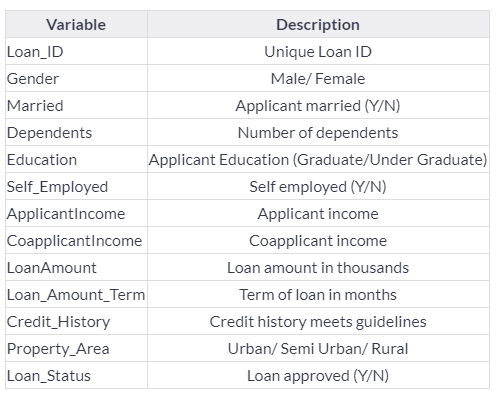

## The data types of each of the variables in the dataset.

In [12]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Finding the unique records in each variable

In [13]:
train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

 **Categorical features** : Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status
 
 **Numercial Features**: ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History.

In [14]:
# Storing categorical & numerical features 
features= [ "Gender", "Married", "Dependents", "Education", "Self_Employed", "Credit_History", "Property_Area", "ApplicantIncome"
          ,"CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]

#Categorical features.
cat_v= [ "Gender", "Married", "Dependents", "Education", "Self_Employed", "Credit_History", "Property_Area"]

#Numerical features
num_v= [c for c in features if c not in cat_v]

num_v

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

### Hypothesis generation

It is important stage in machine learning pipeline. It is done by understanding the problem statement thoroughly.



## Exploratory data analysis

### Exploring null values

In [15]:
null_values_per_variable = 100 * (train.isnull().sum()/train.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending=False)

#Percentage of null values in each variable.

Credit_History       8.1
Self_Employed        5.2
LoanAmount           3.6
Dependents           2.4
Loan_Amount_Term     2.3
Gender               2.1
Married              0.5
Loan_Status          0.0
Property_Area        0.0
CoapplicantIncome    0.0
ApplicantIncome      0.0
Education            0.0
Loan_ID              0.0
dtype: float64

Credit_History has maximum missing among all the variables.

### Checking duplicate observations if any

In [16]:
sum(train.duplicated(subset=None, keep="first"))


0

We understand that there are no duplicate rows in the dataset

### EDA using Visual Analysis Library

In [17]:
VisualAnalysis(train)

## EDA of Cateforical variables

### Let us plot Pie chart for categorical features

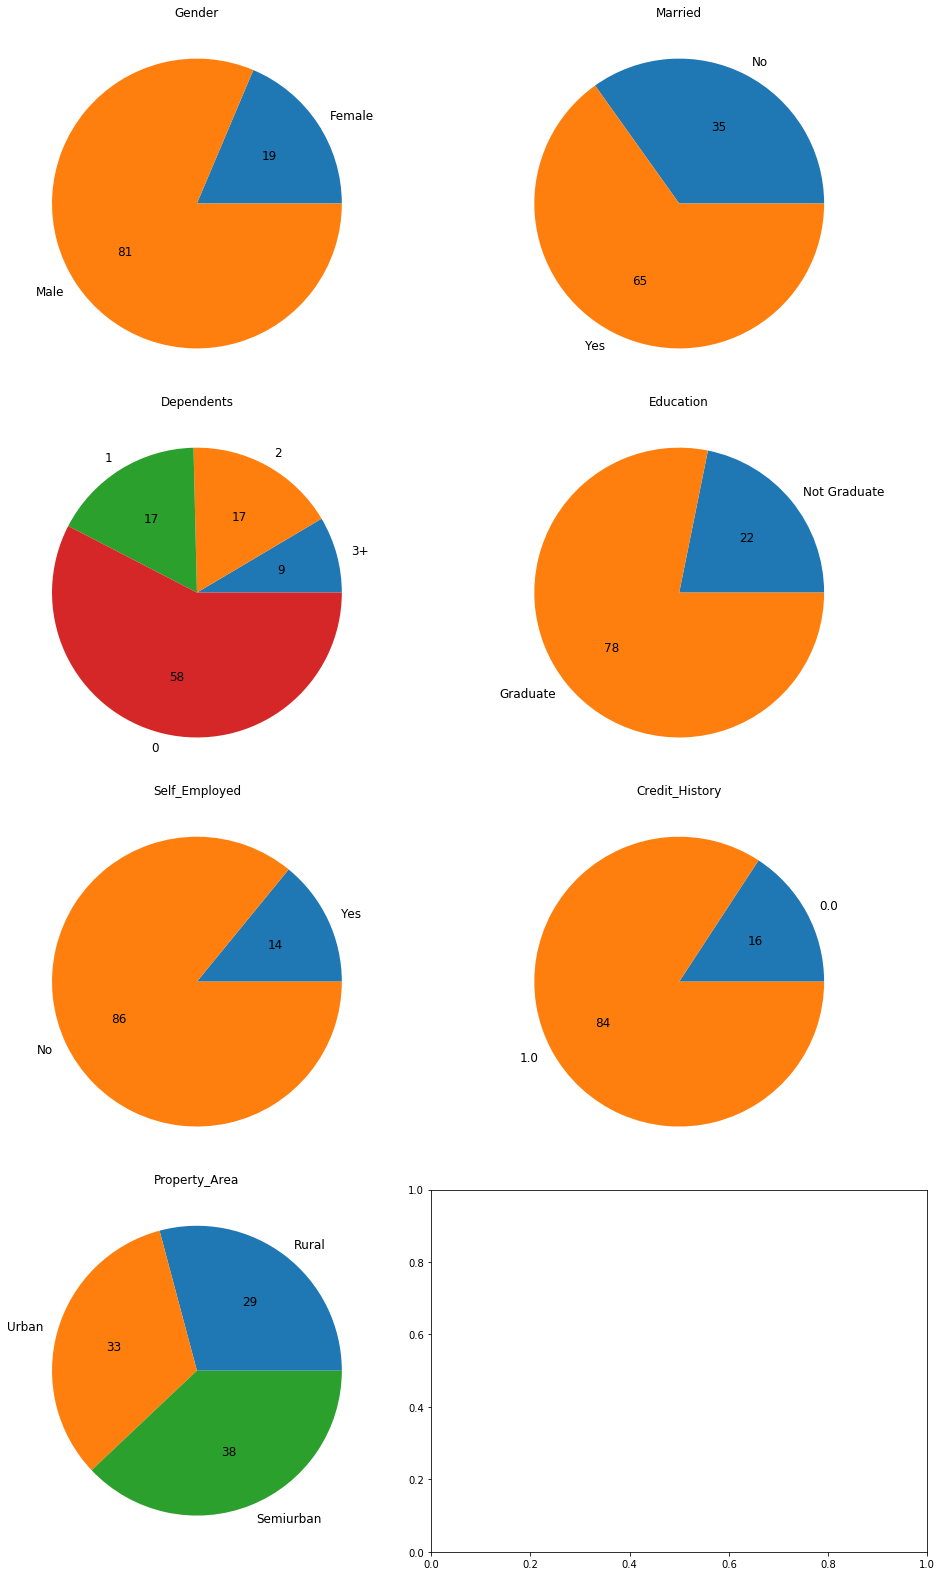

In [18]:
fig, axes = plt.subplots(4, 2, figsize=(14, 22))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(train[cat_v]):
    _ = train[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], title=c, autopct='%.0f', fontsize=12)
    _ = axes[i].set_ylabel('')
    
_ = plt.tight_layout()

### We only understand the proportion from Pie charts. Hence let us create Bar chart to get better picture.

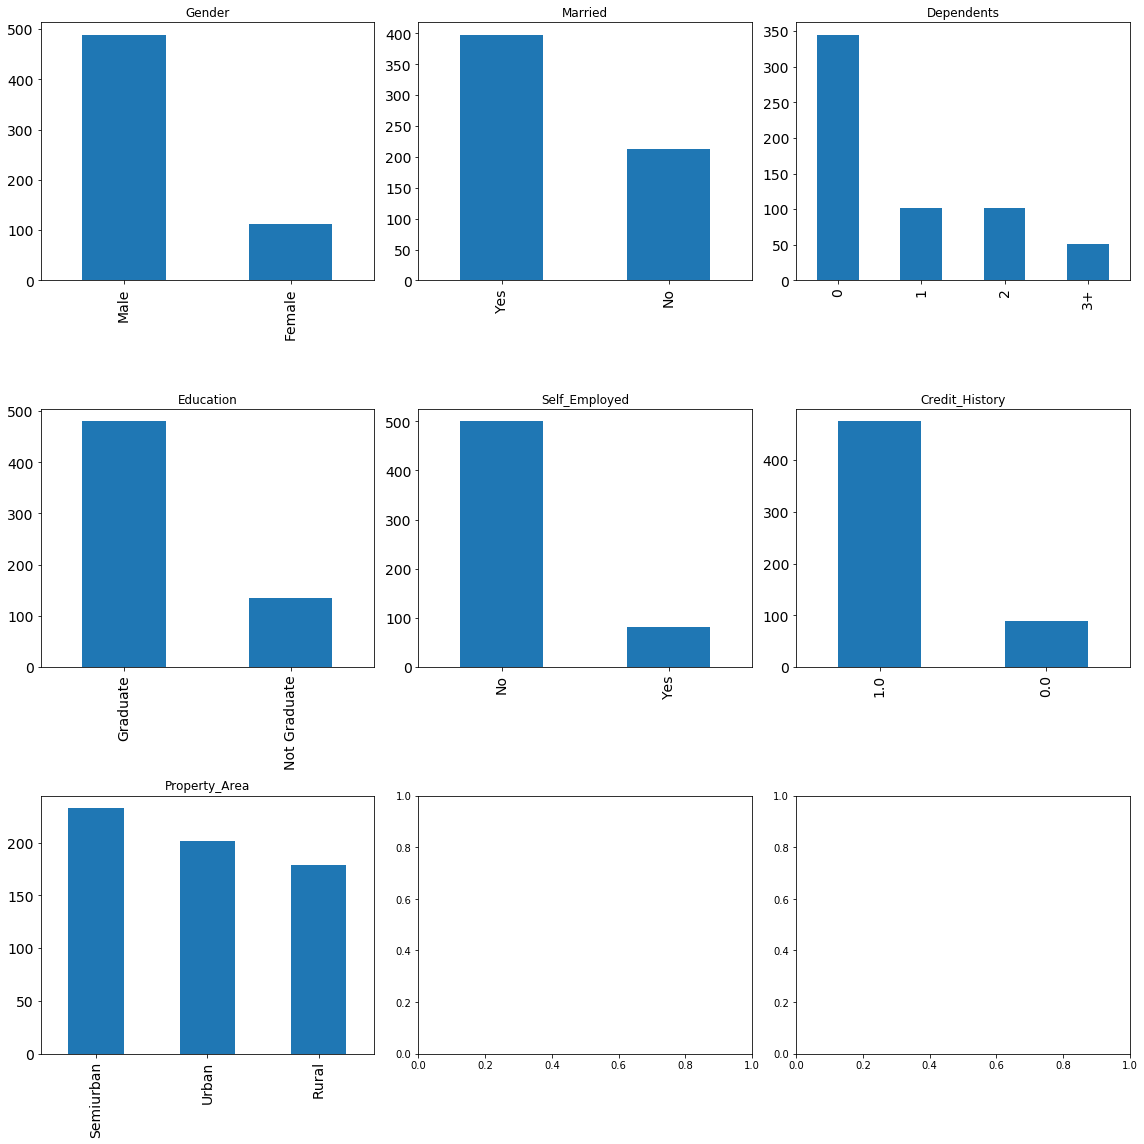

In [19]:
fig, axes = plt.subplots(3, 3, figsize=(16, 16))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(train[cat_v]):
    _ = train[c].value_counts()[::1].plot(kind = 'bar', ax=axes[i], title=c, fontsize=14)
    
_ = plt.tight_layout()

### Target variable

Let us look at the distribution of the Target variable. i.e Loan_Status

In [20]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [21]:
# We can see the proportions 
train['Loan_Status'].value_counts(normalize=True)


Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

### Plotting Bar chart of Target variable

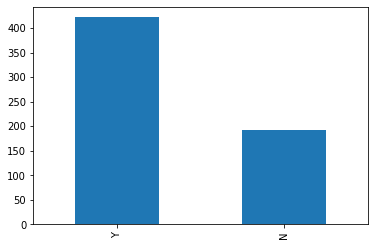

In [22]:
train['Loan_Status'].value_counts().plot.bar()

### We can say that Data is imbalanced bacause Target variable does not have equal classes

## Numerical variables

Let us plot Histogram & Boxplots

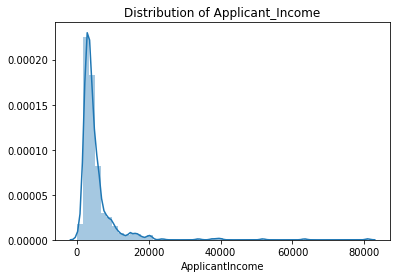

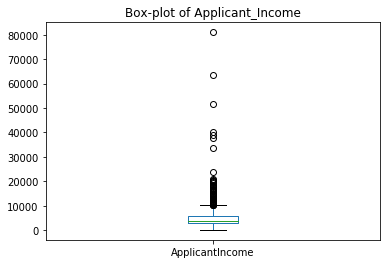

In [23]:
sns.distplot(train["ApplicantIncome"])
plt.title("Distribution of Applicant_Income")
plt.show()
train["ApplicantIncome"].plot.box()
plt.title("Box-plot of Applicant_Income")
plt.show()

### We can see that distribution is right skewed.

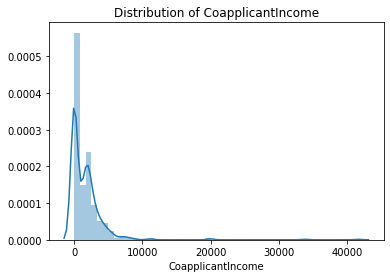

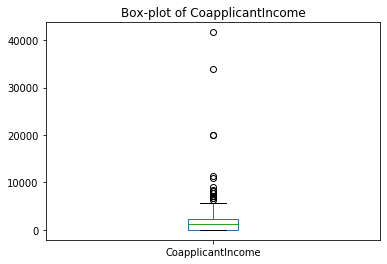

In [24]:
sns.distplot(train["CoapplicantIncome"])
plt.title("Distribution of CoapplicantIncome")
plt.show()
train["CoapplicantIncome"].plot.box()
plt.title("Box-plot of CoapplicantIncome")
plt.show()

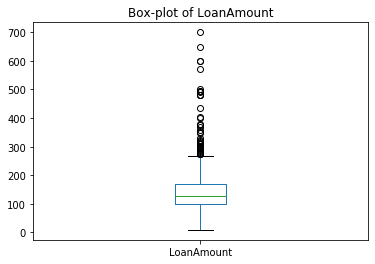

In [25]:

train["LoanAmount"].plot.box()
plt.title("Box-plot of LoanAmount")
plt.show()

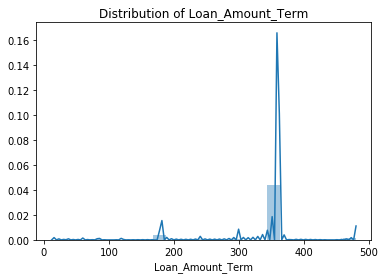

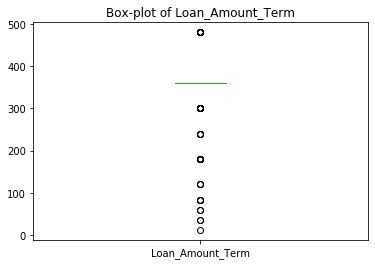

In [26]:
sns.distplot(train["Loan_Amount_Term"])
plt.title("Distribution of Loan_Amount_Term")
plt.show()
train["Loan_Amount_Term"].plot.box()
plt.title("Box-plot of Loan_Amount_Term")
plt.show()

In [27]:
train['LoanAmount'].astype('float')

0        NaN
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64

# Bivariate Analysis

##  Categorical Independent variables vs Target variable

###       1.  Let us understand how the gender is affecting Loan_status

Do we see any significant difference in approval percentage among two genders? Let us see

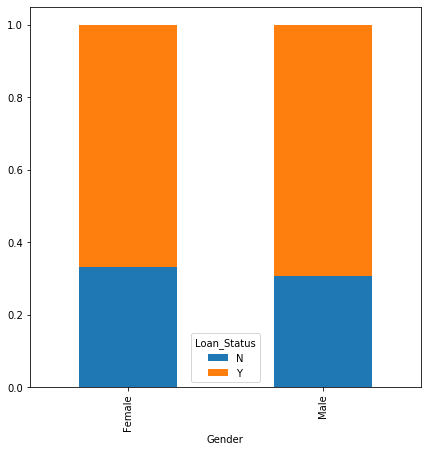

In [28]:
Gender= pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True, figsize=(7,7))

####  We see that the proportion of Loan_status is roughly same. 

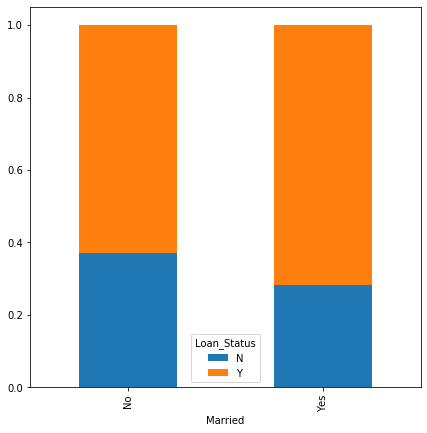

In [29]:
Married= pd.crosstab(train['Married'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True, figsize=(7,7))

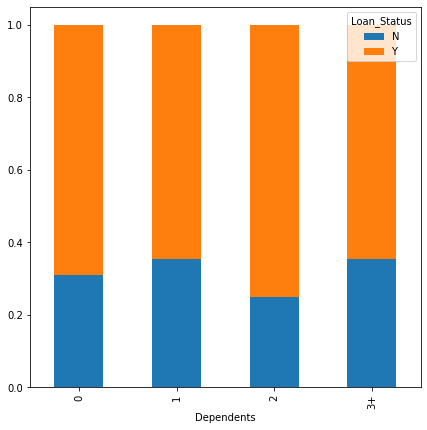

In [30]:
Dependents= pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True, figsize=(7,7))

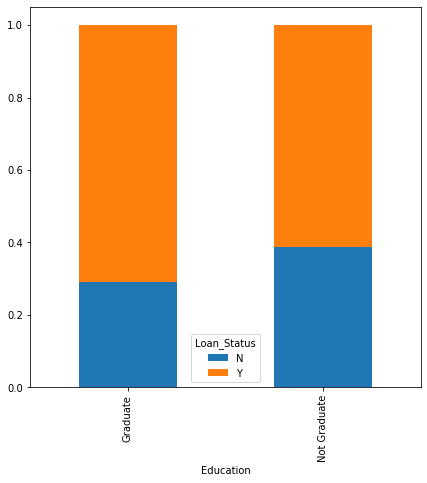

In [31]:
Education= pd.crosstab(train['Education'], train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True, figsize=(7,7))

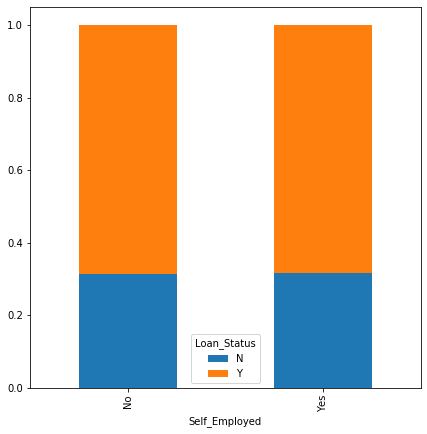

In [32]:
Self_Employed= pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True, figsize=(7,7))

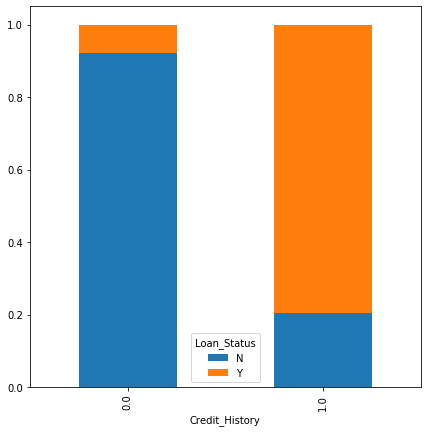

In [33]:
Credit_History= pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True, figsize=(7,7))

#### Credit_History 1 has higher chance to get approved loan

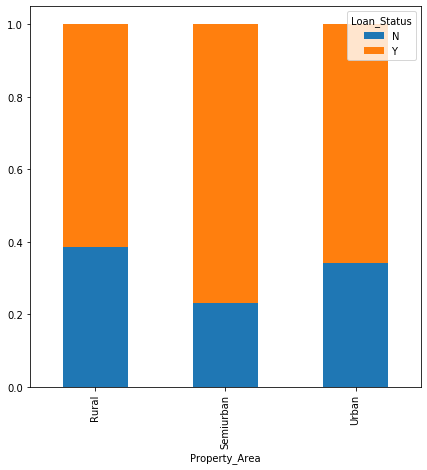

In [34]:
Property_Area= pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True, figsize=(7,7))

#### Proportion of loan getting approved in Semi-urban areas is higher compared to rural & urban.

# Numerical Independent Variables vs Target variable

Let us try to find the mean & median income of people for whom the loan is approved.

Text(0.5, 1.0, 'Comparision of mean income for approved & Non-approved')

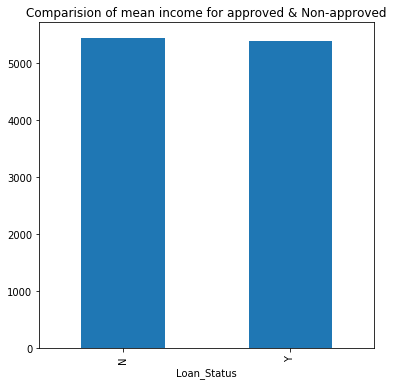

In [35]:
train.groupby("Loan_Status")["ApplicantIncome"].mean().plot.bar(figsize=(6,6))
plt.title("Comparision of mean income for approved & Non-approved")

#### We dont see significant difference in mean income of candidates with Loan_approved & not approved.

### Let us plot the chart for median

Text(0.5, 1.0, 'Comparision of median income for approved & Non-approved')

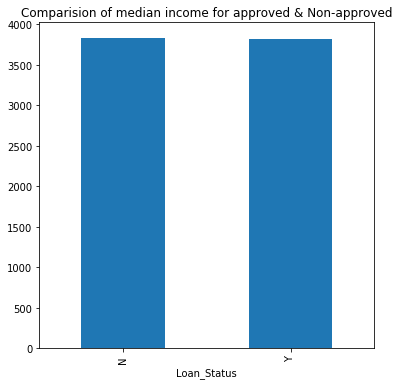

In [36]:
train.groupby("Loan_Status")["ApplicantIncome"].median().plot.bar(figsize=(6,6))
plt.title("Comparision of median income for approved & Non-approved")

#### Here also we do not find  much difference in median income of people whose loan applications were approved vs rejected.

### Since we are not seeing any relationship between income of applicant and Loan_Status, we can make bins of income of applicants as categories. 

Text(0, 0.5, 'Percentage')

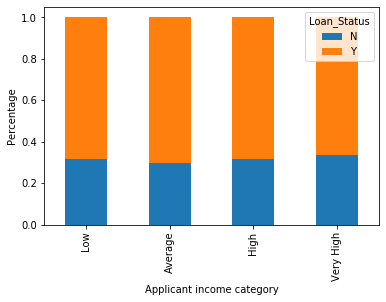

In [37]:
bins= [0,2500, 4000, 6000, 81000]
groups= ["Low","Average" ,"High" ,"Very High"]

train["Income_Bin"]= pd.cut(train['ApplicantIncome'], bins, labels= groups)

Income_bin= pd.crosstab(train["Income_Bin"],train["Loan_Status"])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True )
plt.xlabel("Applicant income category")
plt.ylabel("Percentage")

 #### We dont find the effect of Applicant_Income on Loan approval rate.





### Let us do the same thing for Coapplicant income to see if we can find any insight in loan approval proportion.

Text(0, 0.5, 'Percentage')

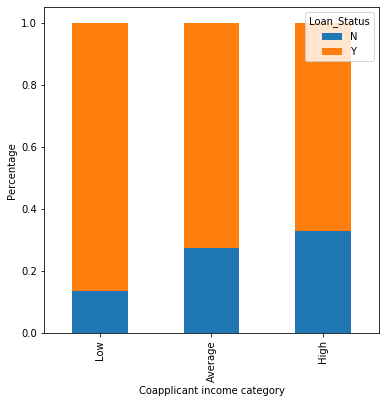

In [38]:
bins= [0,1000, 3000, 42000]
groups= ["Low","Average" ,"High"]

train["Coapplicant_Income_Bin"]= pd.cut(train['CoapplicantIncome'], bins, labels= groups)

Coapplicant_Income_Bin= pd.crosstab(train["Coapplicant_Income_Bin"],train["Loan_Status"])
Coapplicant_Income_Bin.div(Coapplicant_Income_Bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True , figsize=(6,6))
plt.xlabel("Coapplicant income category")
plt.ylabel("Percentage")

### We observe really unusual case from above visual. As the Coapplicant's income is increasing, chances of getting loan approved are reducing. This does not look right. The possible reason may be most of the applicants may not have coapplicant. In such case, coapplicant's income will become 0.


### Let us create a new variable adding Applicant's income & Coapplicant's income to find if we can see any relationship between target variable & total income.


Text(0, 0.5, 'Percentage')

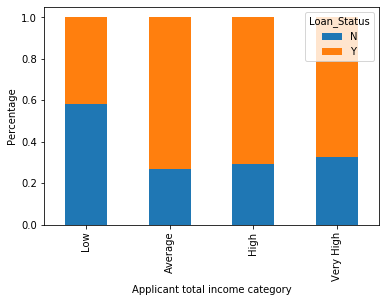

In [39]:
train["total_income"]=  train['ApplicantIncome']+ train["CoapplicantIncome"]

bins= [0,2500, 4000, 6000, 81000]
groups= ["Low","Average" ,"High" ,"Very High"]

train["Total_income_bin"]= pd.cut(train['total_income'], bins, labels= groups)
Total_income_bin = pd.crosstab(train["Total_income_bin"],train["Loan_Status"])
Total_income_bin.div(Total_income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True )
plt.xlabel("Applicant total income category")
plt.ylabel("Percentage")


#### Now we can see the obvious case. The proportion of loan application getting approved in very less for low total_income and it is increasing as total_income is increasing.

## Lets Visualize Loan_Amount variable.

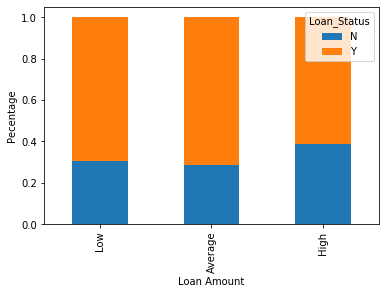

In [40]:
bins_1= [0,100,200,700]
groups_1= ['Low','Average','High']




train['LoanAmount_bin']= pd.cut(train['LoanAmount'], bins_1, labels= groups_1)

LoanAmount_bin= pd.crosstab(train['LoanAmount_bin'], train['Loan_Status'])

LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel("Loan Amount")
plt.ylabel("Pecentage")
plt.show()


In [41]:
#Keeping copy of work.
train_eda= train.copy()


### We can see that proportion of approved loans is higher for Low & Average loan amounts compared to High Loan amounts. Which supports our hypothesis.



#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Now let us drop the new columns with bins we created before.

### We change 3+ in Dependents variable to 3 to make it numerical variable. 

### We also convert target variable Y & N to 1 & 0 respectively. Reason is algorithms like Logistic regression will take only numeric values as input.

In [42]:
train= train.drop(["LoanAmount_bin", "Coapplicant_Income_Bin"], axis=1)


In [43]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_Bin,total_income,Total_income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,5849.0,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,6091.0,Very High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,3000.0,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,4941.0,High
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,6000.0,High


In [44]:
train['Dependents'].replace('3+', 3, inplace=True)
train['Loan_Status'].replace('Y',1, inplace=True)
train['Loan_Status'].replace('N',0, inplace=True)

In [45]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_Bin,total_income,Total_income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,High,5849.0,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,High,6091.0,Very High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,Average,3000.0,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,Average,4941.0,High
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,High,6000.0,High


## Let us look at the correlation between numerical features. 
### We use heat map to visualize the correlations

In [46]:
mat= train.corr()
mat

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,total_income
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710,0.893037
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187,0.342781
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318,0.624621
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268,-0.069948
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678,-0.015109
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000,-0.031271
total_income,0.893037,0.342781,0.624621,-0.069948,-0.015109,-0.031271,1.000000


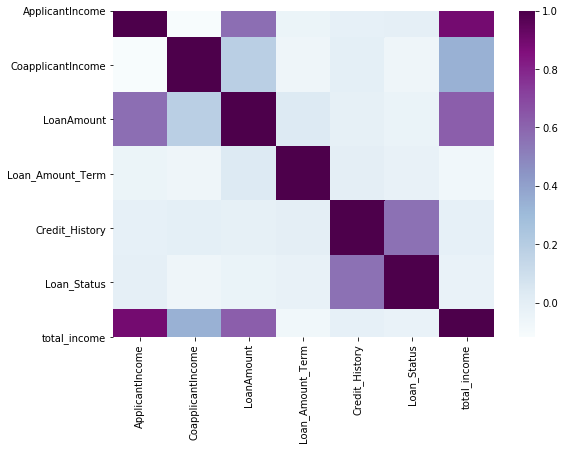

In [47]:
f,ax = plt.subplots(figsize= (9,6))
sns.heatmap(mat, vmax= 1, square=True, cmap= "BuPu")

### We see that Loan Amount & Applicant income are highly correlated.

### We also see that Loan Amount is correlated with Coapplicant's income.

### -------------------------------------------------------------------------------------------------------------------------------------------------------------

# Missing Value & Outlier Treatment.

### We can treat missing values & treat outliers because missing values and outliers can have adverse effect on model performance.

## Missing value imputation

### Let us look at missing value, feature-wise.

In [48]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Income_Bin            0
total_income          0
Total_income_bin      0
dtype: int64

## Let us consider these methods to fill missing values.

###   *For numerical features:*  Imputation using median or mean

###    *For categorical features:* Imputation using mode.

In [49]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)


In [50]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [51]:
#Since more number of cases have loan amount period as 512. Let us impute missing values by mode
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

### Missing value imputaion for Numerical features.

### We know that median is not sensitive to outliers in data. Also mean & median are same for symmetric distribution. Hence we understand that median imputation is good for missing value imputation for numerical features.

Text(0, 0.5, 'Count')

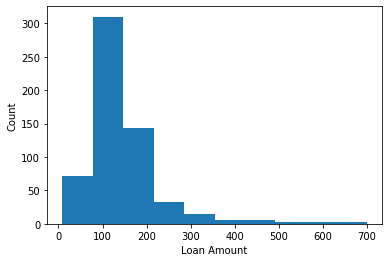

In [52]:
plt.hist(train.LoanAmount)
plt.xlabel("Loan Amount")
plt.ylabel("Count")

### From above histogram, we see that data is right skewed. Hence median imputation is suggested.

In [53]:
train['LoanAmount'].fillna(train['LoanAmount'].mode()[0], inplace=True)

# Outlier Analysis

### It can be seen that outliers affect the mean & standard deviation of the distribution. Which affects the distribution.  

### Since most of the observations in Loan amount variable are spread out on left side, we can apply logarithmic transformation. We will get normal distribution because it does not affect to lower values but reduces larger values.

In [54]:
train['LoanAmount_log']= np.log(train['LoanAmount']) 



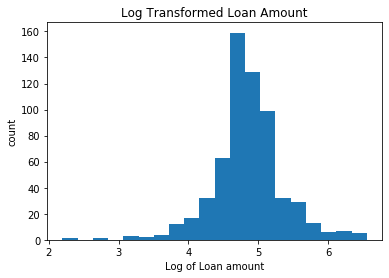

In [55]:
#Plotting Log transformed distribution 

plt.hist(train['LoanAmount_log'],bins=20)
plt.title("Log Transformed Loan Amount")
plt.xlabel('Log of Loan amount')
plt.ylabel('count')
plt.show()

### We can see from above Histogram that transformed values are almost normally distributed.

### -------------------------------------------------------------------------------------------------------------------------------------------------------------

# Model Building

## Model 1: Logistic Regression

#### Logistic Regression is classification algorithm, which is mostly used to solve binary classification problem.

#### Logistic regression is an estimation of logit function. Logit function is Logarithm of odds in favor of an event.

#### Let is drop the Loan_ID column, which is not having any effect on Loan_Status 

In [56]:
train= train.drop('Loan_ID', axis=1)

### Separate dataset into independent & dependent variables.

In [57]:
X= train.drop('Loan_Status', axis=1)
y= train.Loan_Status

In [58]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income_Bin,total_income,Total_income_bin,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,High,5849.0,High,4.787492
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,High,6091.0,Very High,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Average,3000.0,Average,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Average,4941.0,High,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,High,6000.0,High,4.948760


#### Since we will use Log transformed values of Loan_Amount, we will drop the same from Independent variables.

In [59]:
#X_LR= X.drop('LoanAmount', axis=1)

X_LR= X

#### Now we will convert categorical variables into one-hot encoding. 

#### Logistic regression only takes numerical features as input. Hence we need to encode all categorical features to one-hot encoding.

In [60]:
X_LR= pd.get_dummies(X_LR)

## Split data into Train & Test.

In [61]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(X_LR, y, test_size=0.2, random_state=41) 

In [62]:
y_train.value_counts(normalize=True), y_test.value_counts(normalize=False)

(1    0.692464
 0    0.307536
 Name: Loan_Status, dtype: float64, 1    82
 0    41
 Name: Loan_Status, dtype: int64)

 ### Import Logistic regression & accuracy _score from skelearm

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Fitting model on training dataset

In [64]:
model= LogisticRegression()

model.fit(x_train,y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Prediction on test data

In [65]:
pred_test= model.predict(x_test)
test_acc= accuracy_score(y_test, pred_test)

### Checking test accuracy

In [66]:
cm= confusion_matrix(y_test, pred_test)
cm

array([[19, 22],
       [ 2, 80]], dtype=int64)

In [67]:
test_acc

0.8048780487804879

In [68]:
recall= 80/ (80+2)
recall

0.975609756097561

In [69]:
specificity= 18/(18+23)
specificity

0.43902439024390244

### We can say that Logistic regression model is predicting class 1 effectively but performing poorly to predict class 0.

# K-Fold Cross Validation

### Let is import Stratified from Sklearn

In [70]:
from sklearn.model_selection import StratifiedKFold

In [71]:
i=1

kf= StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(x_train, y_train):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = x_train.iloc[train_index], x_train.iloc[test_index]
    ytr, yvl= y_train[train_index], y_train[test_index]
    model= LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_val= model.predict(xvl)
    score= accuracy_score(yvl, pred_val)
    print("Accuracy score: ",score)
    i+=1
    pred_test= model.predict(x_test)
    pred= model.predict_proba(xvl)[:,1]



1 of kfold 5


KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([  3,  13,  16,  22,  25,\n            ...\n            431, 435, 450, 452, 473],\n           dtype='int64', length=81). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

# Feature Engineering

In [72]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income_Bin,total_income,Total_income_bin,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,High,5849.0,High,4.787492
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,High,6091.0,Very High,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Average,3000.0,Average,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Average,4941.0,High,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,High,6000.0,High,4.948760


In [73]:
X.shape

(614, 15)

#### Based on domain knowledge, we can come up with new features from given variables.

#### We will create following variables.

   #### 1. Total Income - We will combine applicant's income & coapplicant's income. If the total income is high then chances of                            getting loan approved is also high.
   
   #### 2. EMI-  Equal monthly installment (EMI) is monthly amount to be paid by applicant to repay loan. If EMI is higher, applicant may find it difficult to repay loan. We can calculate EMI by dividing loan amount by loan amount term (in months).
   
   
  #### 3. Balance Income- This is the income left after EMI has been paid. The idea behind creating this variable is that if Balance income is high, the chances are high that applicant will repay loan and hence increasing chances of loan approval.
  

In [74]:
x_train['total_income']

190    4885.0
567    5900.0
45     3410.0
275    4592.0
385    3667.0
        ...  
407    2213.0
601    5686.0
243    7550.0
321    4531.0
80     3846.0
Name: total_income, Length: 491, dtype: float64

### Let us check the distribution of Total income

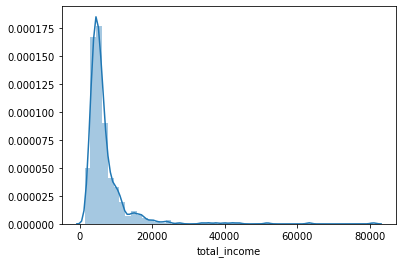

In [75]:
sns.distplot(train['total_income'])

#### We can see that the distribution is right skewed. So let us take log transformation to make the disribution normal.

In [76]:
x_train['total_income_log']= np.log(x_train['total_income'])

x_test['total_income_log']= np.log(x_test['total_income'])





### Now look at the distribution of transformed values


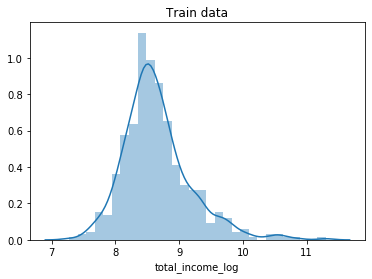

Text(0.5, 1.0, 'Test data')

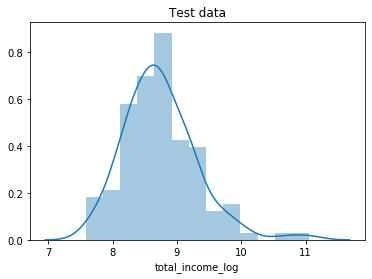

In [77]:
sns.distplot(x_train['total_income_log'])
plt.title('Train data')
plt.show()

sns.distplot(x_test['total_income_log'])
plt.title('Test data')


#### Now we see that transformation made distribution normal.

#### Let us create EMI feature now.

In [78]:
x_train['EMI']= x_train['LoanAmount']/ x_train['Loan_Amount_Term']

x_test['EMI']= x_test['LoanAmount']/ x_test['Loan_Amount_Term']

#### Let us create Balance income feature & check the distribution.

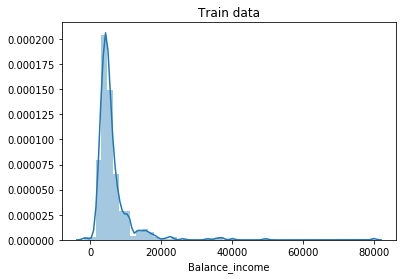

Text(0.5, 1.0, 'Test data')

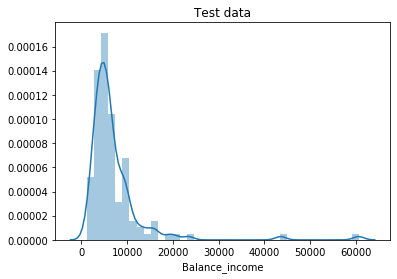

In [79]:
x_train['Balance_income']= x_train['total_income']- (x_train['EMI']*1000)

x_test['Balance_income']= x_test['total_income']- (x_test['EMI']*1000)

sns.distplot(x_train['Balance_income'])
plt.title('Train data')
plt.show()
sns.distplot(x_test['Balance_income'])
plt.title('Test data')

### Let us the the train & test data


In [80]:
(x_train.head(5))


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,total_income,LoanAmount_log,Gender_Female,Gender_Male,Married_No,...,Income_Bin_Average,Income_Bin_High,Income_Bin_Very High,Total_income_bin_Low,Total_income_bin_Average,Total_income_bin_High,Total_income_bin_Very High,total_income_log,EMI,Balance_income
190,4885,0.0,48.0,360.0,1.0,4885.0,3.871201,0,1,1,...,0,1,0,0,0,1,0,8.493925,0.133333,4751.666667
567,3400,2500.0,123.0,360.0,0.0,5900.0,4.812184,0,1,0,...,1,0,0,0,0,1,0,8.682708,0.341667,5558.333333
45,3410,0.0,88.0,360.0,1.0,3410.0,4.477337,1,0,1,...,1,0,0,0,1,0,0,8.134468,0.244444,3165.555556
275,2750,1842.0,115.0,360.0,1.0,4592.0,4.744932,0,1,0,...,1,0,0,0,0,1,0,8.432071,0.319444,4272.555556
385,3667,0.0,113.0,180.0,1.0,3667.0,4.727388,0,1,1,...,1,0,0,0,1,0,0,8.207129,0.627778,3039.222222


In [81]:
(x_test.head(5))

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,total_income,LoanAmount_log,Gender_Female,Gender_Male,Married_No,...,Income_Bin_Average,Income_Bin_High,Income_Bin_Very High,Total_income_bin_Low,Total_income_bin_Average,Total_income_bin_High,Total_income_bin_Very High,total_income_log,EMI,Balance_income
366,2500,0.0,96.0,480.0,1.0,2500.0,4.564348,0,1,1,...,0,0,0,1,0,0,0,7.824046,0.200000,2300.000000
325,8666,4983.0,376.0,360.0,0.0,13649.0,5.929589,0,1,0,...,0,0,1,0,0,0,1,9.521422,1.044444,12604.555556
515,3466,3428.0,150.0,360.0,1.0,6894.0,5.010635,0,1,0,...,1,0,0,0,0,0,1,8.838407,0.416667,6477.333333
296,6875,0.0,200.0,360.0,1.0,6875.0,5.298317,0,1,0,...,0,0,1,0,0,0,1,8.835647,0.555556,6319.444444
227,6250,1695.0,210.0,360.0,1.0,7945.0,5.347108,0,1,0,...,0,0,1,0,0,0,1,8.980298,0.583333,7361.666667


### Let us drop the variables, which we used to create new features. Reason is the correlation between old & new features will be high & logistic regression assumes that there is variables are not highly correlated. Removing the correlated variables will reduce noise also.

In [82]:
x_train= x_train.drop(['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term'], axis=1)

x_test= x_test.drop(['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term'], axis=1)

# Model Building - Part 2

#### Now we will build model with newly created features.

## Model 1 - Logistic Regression

In [83]:
i=1

val_score= []

kf= StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(x_train, y_train):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    
    xtr, xval= x_train.iloc[train_index], x_train.iloc[test_index]
    ytr, yval= y_train.iloc[train_index], y_train.iloc[test_index]
    
    model= LogisticRegression(random_state=1)
    
    model.fit(xtr, ytr)
    
    pred_val= model.predict(xval)
    score= accuracy_score(yval, pred_val)
    val_score.append(score)
    print('accuracy score: ', score)
    
    i= i+1
    
print('\n')  

print('Mean validation score for Logistic regression model is: ',(sum(val_score)/ len(val_score)).round(3))
print('\n')
pred_test= model.predict(x_test)
test_score= accuracy_score(y_test, pred_test)
print('Test accuracy score: ', test_score.round(3))

cm_2= confusion_matrix(y_test, pred_test)
print('\n')
print('Confusion matrix for Logistic Regression Model')
print(cm_2)




1 of kfold 5
accuracy score:  0.7373737373737373

2 of kfold 5
accuracy score:  0.826530612244898

3 of kfold 5
accuracy score:  0.8163265306122449

4 of kfold 5
accuracy score:  0.826530612244898

5 of kfold 5
accuracy score:  0.7857142857142857


Mean validation score for Logistic regression model is:  0.798


Test accuracy score:  0.764


Confusion matrix for Logistic Regression Model
[[19 22]
 [ 7 75]]


### Plotting Confusion Matrix for Logistic Regression model

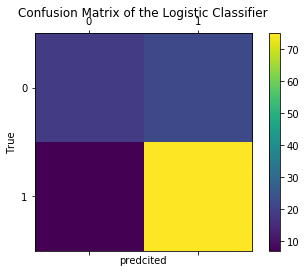

In [84]:
labels= [0,1]
cm_2
fig= plt.figure()
ax= fig.add_subplot(111)
cax= ax.matshow(cm_2)
plt.title('Confusion Matrix of the Logistic Classifier')
print('\n')
fig.colorbar(cax)
ax.set_xticklabels(['']+ labels)
ax.set_yticklabels(['']+ labels)
plt.xlabel('predcited')
plt.ylabel('True')
plt.show()


We can understand that our Logistic regression model is predicting class 1 correctly most of the times. But performing poor while predicting class 0. 

Reason: Data in imbalanced. That is target variables does not have same proportion of classes. 

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

# Model 2 -  Decision Tree

Decision tree is supervised Machine Learning algorithm .

 Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes.

In [85]:
from sklearn import tree

i=1

val_score= []

kf= StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(x_train, y_train):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    
    xtr, xval= x_train.iloc[train_index], x_train.iloc[test_index]
    ytr, yval= y_train.iloc[train_index], y_train.iloc[test_index]
    
    model= tree.DecisionTreeClassifier(random_state=1)
    
    model.fit(xtr, ytr)
    
    pred_val= model.predict(xval)
    score= accuracy_score(yval, pred_val)
    val_score.append(score)
    print('accuracy score: ', score)
    
    i= i+1
    
print('\n')  

print('Mean validation score for Decision tree classifier model is: ',(sum(val_score)/ len(val_score)).round(3))
print('\n')
pred_test= model.predict(x_test)
test_score= accuracy_score(y_test, pred_test)
print('Test accuracy score: ', test_score.round(3))

cm_3= confusion_matrix(y_test, pred_test)
print('\n')
print('Confusion matrix for Decision tree classifier model Model')
print(cm_3)






1 of kfold 5
accuracy score:  0.6767676767676768

2 of kfold 5
accuracy score:  0.6836734693877551

3 of kfold 5
accuracy score:  0.7755102040816326

4 of kfold 5
accuracy score:  0.7755102040816326

5 of kfold 5
accuracy score:  0.6938775510204082


Mean validation score for Decision tree classifier model is:  0.721


Test accuracy score:  0.691


Confusion matrix for Decision tree classifier model Model
[[24 17]
 [21 61]]


### Plotting Confusion Matrix for Decsion Tree Model

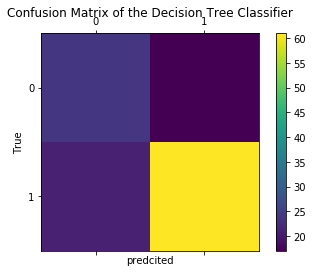

In [86]:
labels= [0,1]
cm_3
fig= plt.figure()
ax= fig.add_subplot(111)
cax= ax.matshow(cm_3)
plt.title('Confusion Matrix of the Decision Tree Classifier')
print('\n')
fig.colorbar(cax)
ax.set_xticklabels(['']+ labels)
ax.set_yticklabels(['']+ labels)
plt.xlabel('predcited')
plt.ylabel('True')
plt.show()


note: calculate recall, precision & F1-score

# ------------------------------------------------------------------------------------------------------------

# Model 3 -  Random Forest

- Random forest is tree based bootstrapping algorithm wherein a certain number of weak learners (decision trees) are combined to give powerful prediction model.


- For every individual learner, a random sample of observations & few randomly selected variables are used to build a decision tree model. 


- Final prediction can be the function of all the predictions made by individual learners


- Incase of classification problem, final prediction will be mode of all the predictions made by individual learners.


- Incase of regression problem, final prediction will be mean of all the predictions made by individual learners.

#### Importing libraries & building model

In [87]:
from sklearn.ensemble import RandomForestClassifier



In [88]:
from sklearn import tree

i=1

val_score= []

kf= StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(x_train, y_train):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    
    xtr, xval= x_train.iloc[train_index], x_train.iloc[test_index]
    ytr, yval= y_train.iloc[train_index], y_train.iloc[test_index]
    
    model= RandomForestClassifier(random_state=1, max_depth=10)
    
    model.fit(xtr, ytr)
    
    pred_val= model.predict(xval)
    score= accuracy_score(yval, pred_val)
    val_score.append(score)
    print('accuracy score: ', score)
    
    i= i+1
    
print('\n')  

print('Mean validation score for Random Forest classifier model is: ',(sum(val_score)/ len(val_score)).round(3))
print('\n')
pred_test= model.predict(x_test)
test_score= accuracy_score(y_test, pred_test)
print('Test accuracy score: ', test_score.round(3))

cm_4= confusion_matrix(y_test, pred_test)
print('\n')
print('Confusion matrix for Random Forest classifier model Model')
print(cm_4)






1 of kfold 5
accuracy score:  0.7272727272727273

2 of kfold 5
accuracy score:  0.8061224489795918

3 of kfold 5
accuracy score:  0.7857142857142857

4 of kfold 5
accuracy score:  0.7653061224489796

5 of kfold 5
accuracy score:  0.7755102040816326


Mean validation score for Random Forest classifier model is:  0.772


Test accuracy score:  0.748


Confusion matrix for Random Forest classifier model Model
[[22 19]
 [12 70]]


## Plotting Confusion Matrix for Random Forest Model

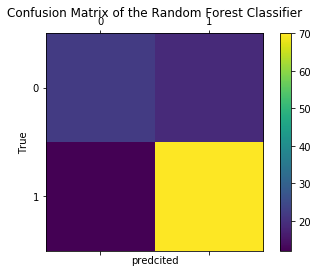

In [89]:
labels= [0,1]
cm_4
fig= plt.figure()
ax= fig.add_subplot(111)
cax= ax.matshow(cm_4)
plt.title('Confusion Matrix of the Random Forest Classifier')
print('\n')
fig.colorbar(cax)
ax.set_xticklabels(['']+ labels)
ax.set_yticklabels(['']+ labels)
plt.xlabel('predcited')
plt.ylabel('True')
plt.show()


Note: do analysis with recall, precision & F1-score

### ------------------------------------------------------------------------------------------------------------------------------------------------------------

# Model 4- Random Forest using Grid Search
### Improving accuracy of model using Grid-Search 

- Grid search is way to select the best family of hyper parameters. 

- We will tune maximum depth of tree & n_estimators. 

maximum depth decides maximum depth of tree & n_estimators will decide the number of trees that will be used in random forest model.

In [90]:
from sklearn.model_selection import GridSearchCV


In [91]:
# Provide range for max_depth from 1 to 20 with an interval of 2 & from 1 to 200 with an interval of 20 for n_estimators.

paramgrid= {'max_depth': list(range(1,20,2)), 'n_estimators': list(range(1,200,20))}

grid_search = GridSearchCV(RandomForestClassifier(random_state=1), paramgrid)

# Fit grid search model

grid_search.fit(x_train, y_train)





C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_gri

### Estimating optimized parameters

In [92]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=21,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

We see that optimized value for max_depth=5 & n_estimators= 21  

Let us build model using the above optimized parameters.

In [93]:
i=1

val_score= []

kf= StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(x_train, y_train):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    
    xtr, xval= x_train.iloc[train_index], x_train.iloc[test_index]
    ytr, yval= y_train.iloc[train_index], y_train.iloc[test_index]
    
    model= RandomForestClassifier(random_state=1,max_depth=5, n_estimators=21)
    
    model.fit(xtr, ytr)
    
    pred_val= model.predict(xval)
    score= accuracy_score(yval, pred_val)
    val_score.append(score)
    print('accuracy score: ', score)
    
    i= i+1
    
print('\n')  

print('Mean validation score for Random Forest classifier model using Grid Search is: ',(sum(val_score)/ len(val_score)).round(3))
print('\n')
pred_test= model.predict(x_test)
test_score= accuracy_score(y_test, pred_test)
print('Test accuracy score: ', test_score.round(3))

cm_5= confusion_matrix(y_test, pred_test)
print('\n')
print('Confusion matrix for Random Forest classifier model Model using Grid Search')
print(cm_5)


1 of kfold 5
accuracy score:  0.7777777777777778

2 of kfold 5
accuracy score:  0.8163265306122449

3 of kfold 5
accuracy score:  0.8163265306122449

4 of kfold 5
accuracy score:  0.8367346938775511

5 of kfold 5
accuracy score:  0.8163265306122449


Mean validation score for Random Forest classifier model using Grid Search is:  0.813


Test accuracy score:  0.78


Confusion matrix for Random Forest classifier model Model using Grid Search
[[17 24]
 [ 3 79]]


### Plotting Confusion Matrix for Random Forest Model using Grid Search

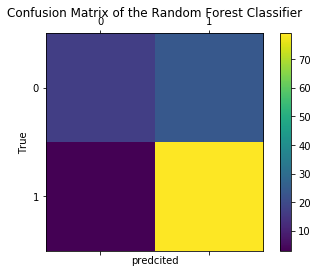

In [94]:
labels= [0,1]
cm_5
fig= plt.figure()
ax= fig.add_subplot(111)
cax= ax.matshow(cm_5)
plt.title('Confusion Matrix of the Random Forest Classifier')
print('\n')
fig.colorbar(cax)
ax.set_xticklabels(['']+ labels)
ax.set_yticklabels(['']+ labels)
plt.xlabel('predcited')
plt.ylabel('True')
plt.show()


note: do recall, precision, F1-score. 


#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Let us find the feature importance to see which features are more important in predicting outcome.

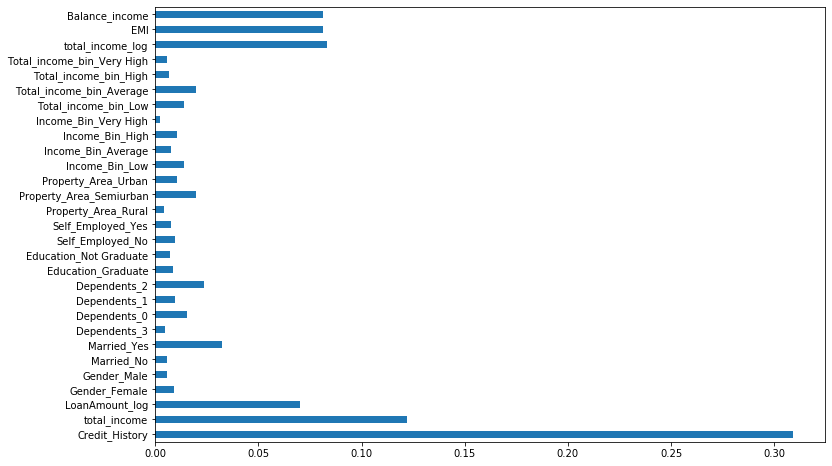

In [95]:
importances= pd.Series(model.feature_importances_, index= x_train.columns)

importances.plot(kind= 'barh', figsize= (12,8) )

# Model 5 - XGBoost

In [96]:
import xgboost as xgb

In [97]:
import xgboost as xgb

In [98]:
from xgboost import XGBClassifier

In [99]:
i=1

val_score= []

kf= StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(x_train, y_train):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    
    xtr, xval= x_train.iloc[train_index], x_train.iloc[test_index]
    ytr, yval= y_train.iloc[train_index], y_train.iloc[test_index]
    
    model= XGBClassifier(n_estimators= 50, max_depth=4)
    
    model.fit(xtr, ytr)
    
    pred_val= model.predict(xval)
    score= accuracy_score(yval, pred_val)
    val_score.append(score)
    print('accuracy score: ', score)
    
    i= i+1
    
print('\n')  

print('Mean validation score for XGBoost classifier model is: ',(sum(val_score)/ len(val_score)).round(3))
print('\n')
pred_test= model.predict(x_test)
test_score= accuracy_score(y_test, pred_test)
print('Test accuracy score: ', test_score.round(3))

cm_6= confusion_matrix(y_test, pred_test)
print('\n')
print('Confusion matrix for XGBoost classifier model Model is: ')
print(cm_6)


1 of kfold 5
accuracy score:  0.7070707070707071

2 of kfold 5
accuracy score:  0.7857142857142857

3 of kfold 5
accuracy score:  0.7959183673469388

4 of kfold 5
accuracy score:  0.8367346938775511

5 of kfold 5
accuracy score:  0.8061224489795918


Mean validation score for XGBoost classifier model is:  0.786


Test accuracy score:  0.764


Confusion matrix for XGBoost classifier model Model is: 
[[19 22]
 [ 7 75]]


### Plotting Confusion Matrix for XGBoost Model

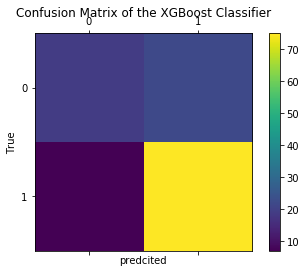

In [100]:
labels= [0,1]
cm_6
fig= plt.figure()
ax= fig.add_subplot(111)
cax= ax.matshow(cm_6)
plt.title('Confusion Matrix of the XGBoost Classifier')
print('\n')
fig.colorbar(cax)
ax.set_xticklabels(['']+ labels)
ax.set_yticklabels(['']+ labels)
plt.xlabel('predcited')
plt.ylabel('True')
plt.show()


In [102]:
print(cm_2)

[[19 22]
 [ 7 75]]


In [103]:
print(cm_3)

[[24 17]
 [21 61]]


In [104]:
print(cm_4)

[[22 19]
 [12 70]]


In [105]:
print(cm_5)

[[17 24]
 [ 3 79]]


In [106]:
x_test.shape

(123, 29)

### Conclusion

We see that out of all models, Random Forest algorithm with Grid Search is giving us maximum accuracy (0.78)